# Introduction to matchms

`matchms` is an open-source Python library to handle, process, and compare MS/MS spectra. It is particularly geared towards large-scale similarity computations. In addition, matchms is intended to serve as a hub for developing new computational tools on top of it.

Some tools which are build on top of matchms:

+ [`Spec2Vec`](https://github.com/iomega/spec2vec) an alternative machine-learning spectral similarity score that can simply be installed by `pip install spec2vec` and be imported as `from spec2vec import Spec2Vec` following the same API as the scores in `matchms.similarity`.

+ [`MS2DeepScore`](https://github.com/matchms/ms2deepscore) a supervised, deep-learning based spectral similarity score that can simply be installed by `pip install ms2deepscore` and be imported as `from ms2deepscore import MS2DeepScore` following the same API as the scores in `matchms.similarity`.

+ [`MS2Query`](https://github.com/iomega/ms2query) Reliable and fast MS/MS spectral-based analogue search, running on top of matchms.

+ [`memo`](https://github.com/mandelbrot-project/memo) a method allowing a Retention Time (RT) agnostic alignment of metabolomics samples using the fragmentation spectra (MS2) of their constituents.

The source code of `matchms` is on GitHub --> https://github.com/matchms/matchms
This is also where you can interact with the developers of the tool (e.g., report problems, suggest new features, or: contribute yourself!).

In [1]:
# Necessary to install (if not present yet)
!pip install matchms

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.9/136.9 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 45.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 40.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 68.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.1/235.1 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 25.6 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: pillow
 

# Import libraries

In [2]:
import os
from matplotlib import pyplot as plt

from matchms import calculate_scores
from matchms.importing import load_from_mgf

## Import data
`matchms` can import and export MS/MS spectra from/to a few common formats such as .mgf, .msp, .mzxml, .json. Here we will simply import the example data as it came straight from MzMine.

In [3]:
# Use this to mount your own google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# Specify data (and model) locations
path_root = "./drive/MyDrive/summerschool2023_matchms"
file = os.path.join(path_root, "data_mzmine", "example_iimn_gnps.mgf")

# Import spectra
spectra = list(load_from_mgf(file))

## What do we get from this?
Let's have a look at what the spectra now look like within matchms.

In [8]:
len(spectra)

6112

In [9]:
type(spectra)

list

In [10]:
spectra[0]

## matchms `Spectrum` objects
In `matchms` each MS/MS spectrum is handled as a `Spectrum` object.

- contains the MS/MS fragments --> `spectrum.peaks`  
The fragments are divided into m/z positions --> `spectrum.peaks.mz`  
and intensities --> `spectrum.peaks.intensities`
- contains the metadata --> `spectrum.metadata`

It also comes with basic functions (methods) to inspect or edit parts of the spectrum.
- basic plotting --> `spectrum.plot()`
- read metadata fields --> `spectrum.get("charge")`
- set metadata fields --> `spectrum.get("special_comments", "Nice!")`

### Mini-Exercise:
- How many fragments/peaks has the first spectrum in our list?
- What is the highest fragement m/z?
- Use the `.set()` method to add a "note_to_supervisor" field to the metadata and write into this field whatever you like (your superviser is likely to never read it...)
- Check if you indeed added the note by using the `.get()` method.

In [11]:
spectra[0].peaks

In [12]:
spectra[0].peaks.mz

array([ 67.9357,  93.0705, 107.0861, 123.0812, 126.9723, 151.0757])

In [13]:
spectra[0].peaks.intensities

array([2800., 3000., 2800., 2900., 3900., 2800.])

In [14]:
# Use Python for whatever you want to do...
for s in spectra:
    if len(s.peaks) > 10:
        s.set("unqualified_comments", "Awesome!")
    elif len(s.peaks) > 5:
        s.set("unqualified_comments", "Will do.")
    else:
        s.set("unqualified_comments", "Oh no.")

In [15]:
spectra[0].metadata

{'feature_id': '8808',
 'pepmass': (150.5959, None),
 'scans': '8808',
 'charge': 2,
 'retention_time': 289.304,
 'ms_level': '2',
 'precursor_mz': 150.5959,
 'unqualified_comments': 'Will do.'}

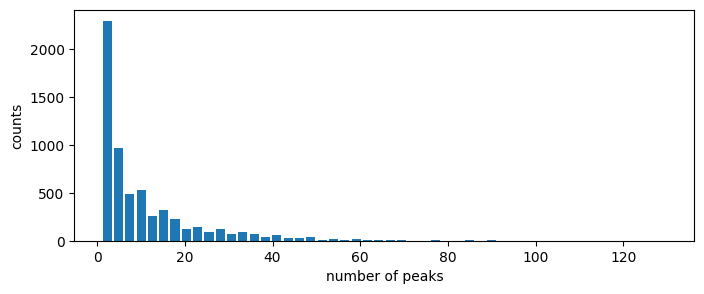

In [16]:
number_of_peaks = [len(s.peaks) for s in spectra]

fig, ax = plt.subplots(figsize=(8, 3))
ax.hist(number_of_peaks, bins=50, rwidth=0.8)
ax.set_ylabel("counts")
ax.set_xlabel("number of peaks")
plt.show()

## Process spectra

`matchms` comes with many filtering functions (in `matchms.filtering`). Even better: If you want something very specific or novel, you can also build your own filters. And even better yet: you could become a co-developer of matchms and add a filter you miss to the library!

In general, there are filters with focus on the **metadata**. For instance to correct, add, edit, harmonize specific metadata fields. And there are filters for the **fragments**, for instance to remove small peaks, normalize peak intensities etc.

From matchms 0.22 on (made right before this summerschool), the central element to apply filters is the `SpectrumProcessor`.

Here, we will apply:
- A few default filters to harmonize metadata
- Normalize peak intensities (to max=1.0)
- Remove all peaks outside 10.0 to 1000.0 Da m/z window
- Remove spectra with < 4 remaining peaks

The last two teps are potentially important for tools like `Spec2Vec` or `MS2DeepScore` which make predictions solely based on the MS2 peaks.

In [17]:
from matchms import SpectrumProcessor

min_number_peaks = 4

# Define filter pipeline
processor = SpectrumProcessor("basic")
processor.add_matchms_filter("normalize_intensities")
processor.add_matchms_filter(("select_by_mz", {"mz_from": 10, "mz_to": 1000}))
processor.add_matchms_filter(("require_minimum_number_of_peaks", {"n_required": min_number_peaks}))

# Apply filter pipeline
spectra_cleaned = processor.process_spectrums(spectra)
print(f"Number of remaining spectra: {len(spectra_cleaned)}")

Processing spectrums: 100%|██████████| 6112/6112 [00:20<00:00, 302.94it/s]

Number of remaining spectra: 3802


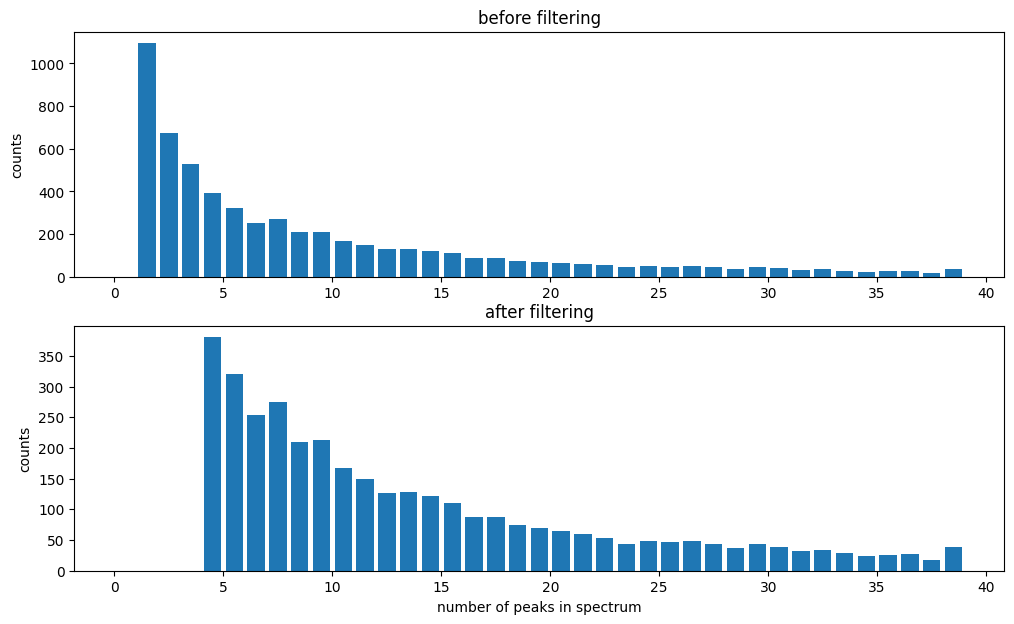

In [18]:
import numpy as np

bins = np.arange(0, 40, 1)
# Plots
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 7))
ax1.hist([len(s.peaks) for s in spectra], bins=bins, rwidth=0.8)
ax1.set_title("before filtering")
ax1.set_ylabel("counts")
ax2.hist([len(s.peaks) for s in spectra_cleaned], bins=bins, rwidth=0.8)
ax2.set_title("after filtering")
ax2.set_ylabel("counts")
ax2.set_xlabel("number of peaks in spectrum")
plt.show()

In [19]:
spectra_cleaned[0].metadata

{'feature_id': '8808',
 'pepmass': (150.5959, None),
 'scans': '8808',
 'charge': 2,
 'retention_time': 289.304,
 'ms_level': '2',
 'precursor_mz': 150.5959,
 'unqualified_comments': 'Will do.',
 'ionmode': 'n/a'}

In [20]:
for s in spectra_cleaned:
    s.set("ionmode", "positive")

# Check if it worked
spectra_cleaned[0].metadata

{'feature_id': '8808',
 'pepmass': (150.5959, None),
 'scans': '8808',
 'charge': 2,
 'retention_time': 289.304,
 'ms_level': '2',
 'precursor_mz': 150.5959,
 'unqualified_comments': 'Will do.',
 'ionmode': 'positive'}

## Basic plotting (only for quick inspection)

(<Figure size 1600x1200 with 1 Axes>,
 <Axes: title={'center': 'Spectrum'}, xlabel='m/z', ylabel='Intensity'>)

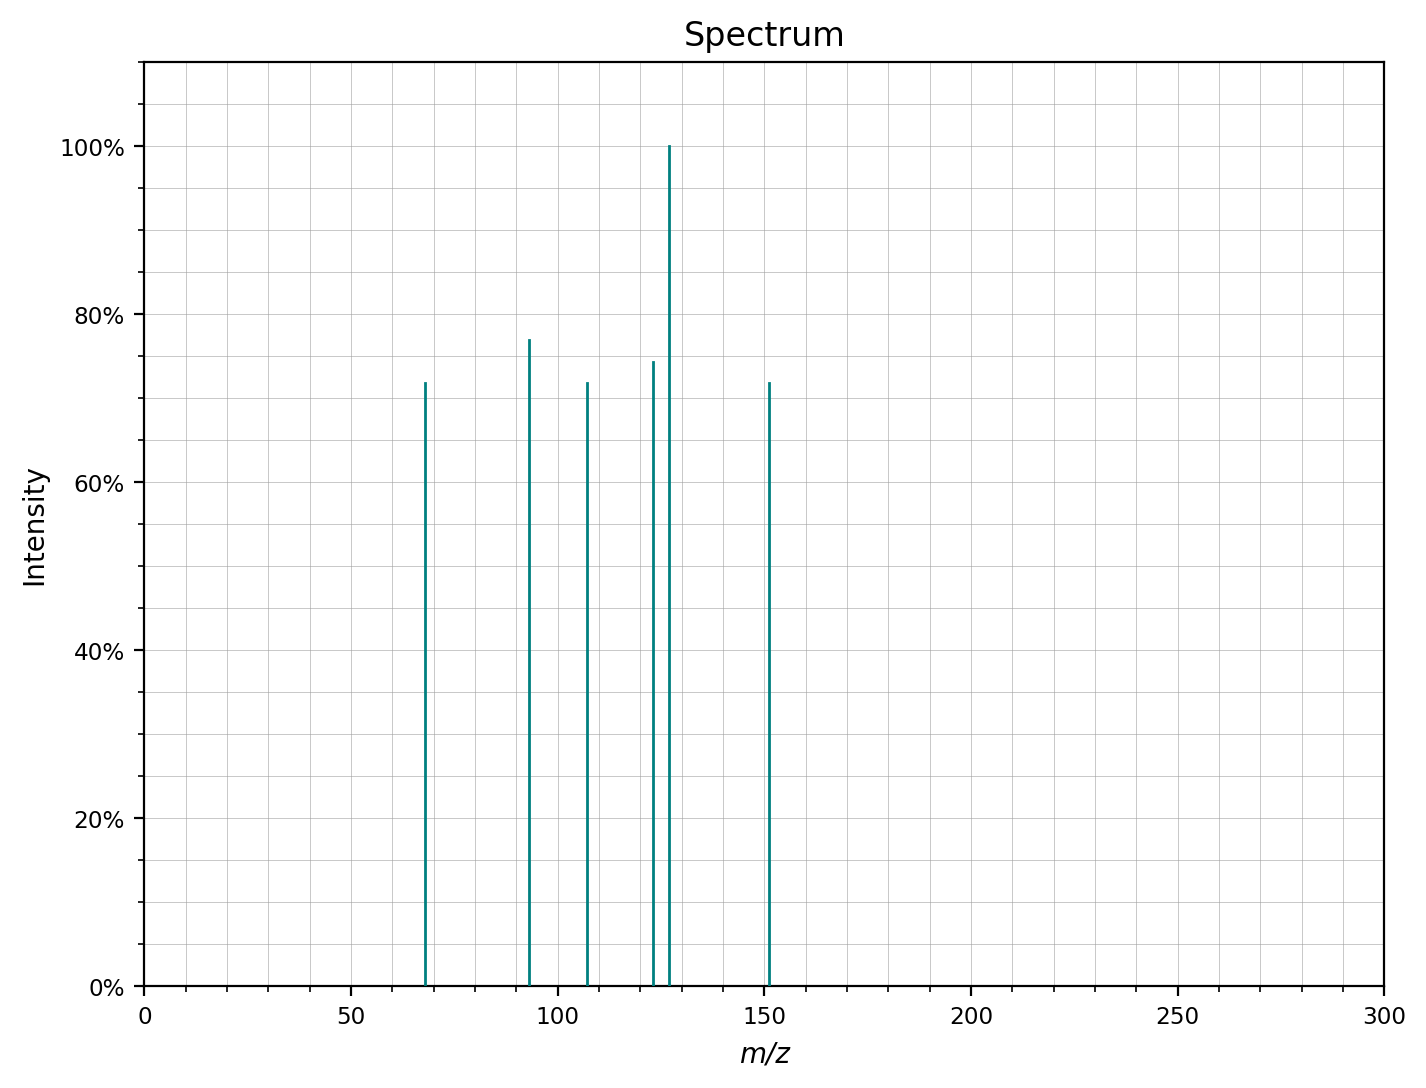

In [21]:
spectra_cleaned[0].plot()

(<Figure size 1600x1200 with 1 Axes>,
 <Axes: title={'center': 'Spectrum comparison'}, xlabel='m/z', ylabel='Intensity'>)

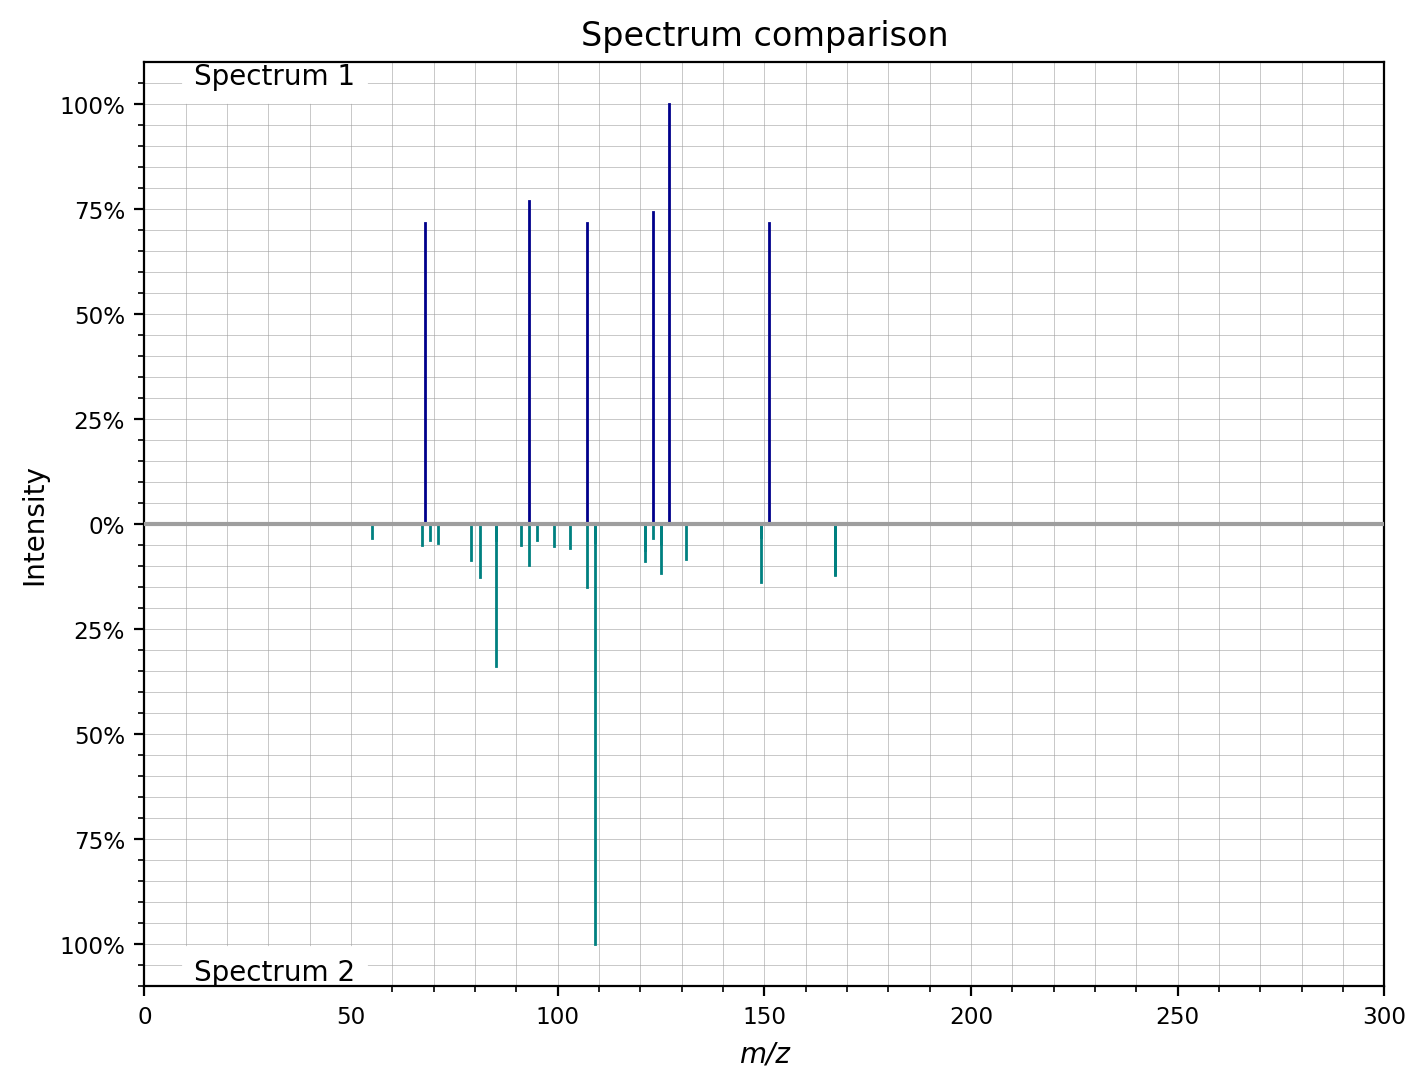

In [22]:
spectra_cleaned[0].plot_against(spectra_cleaned[151])

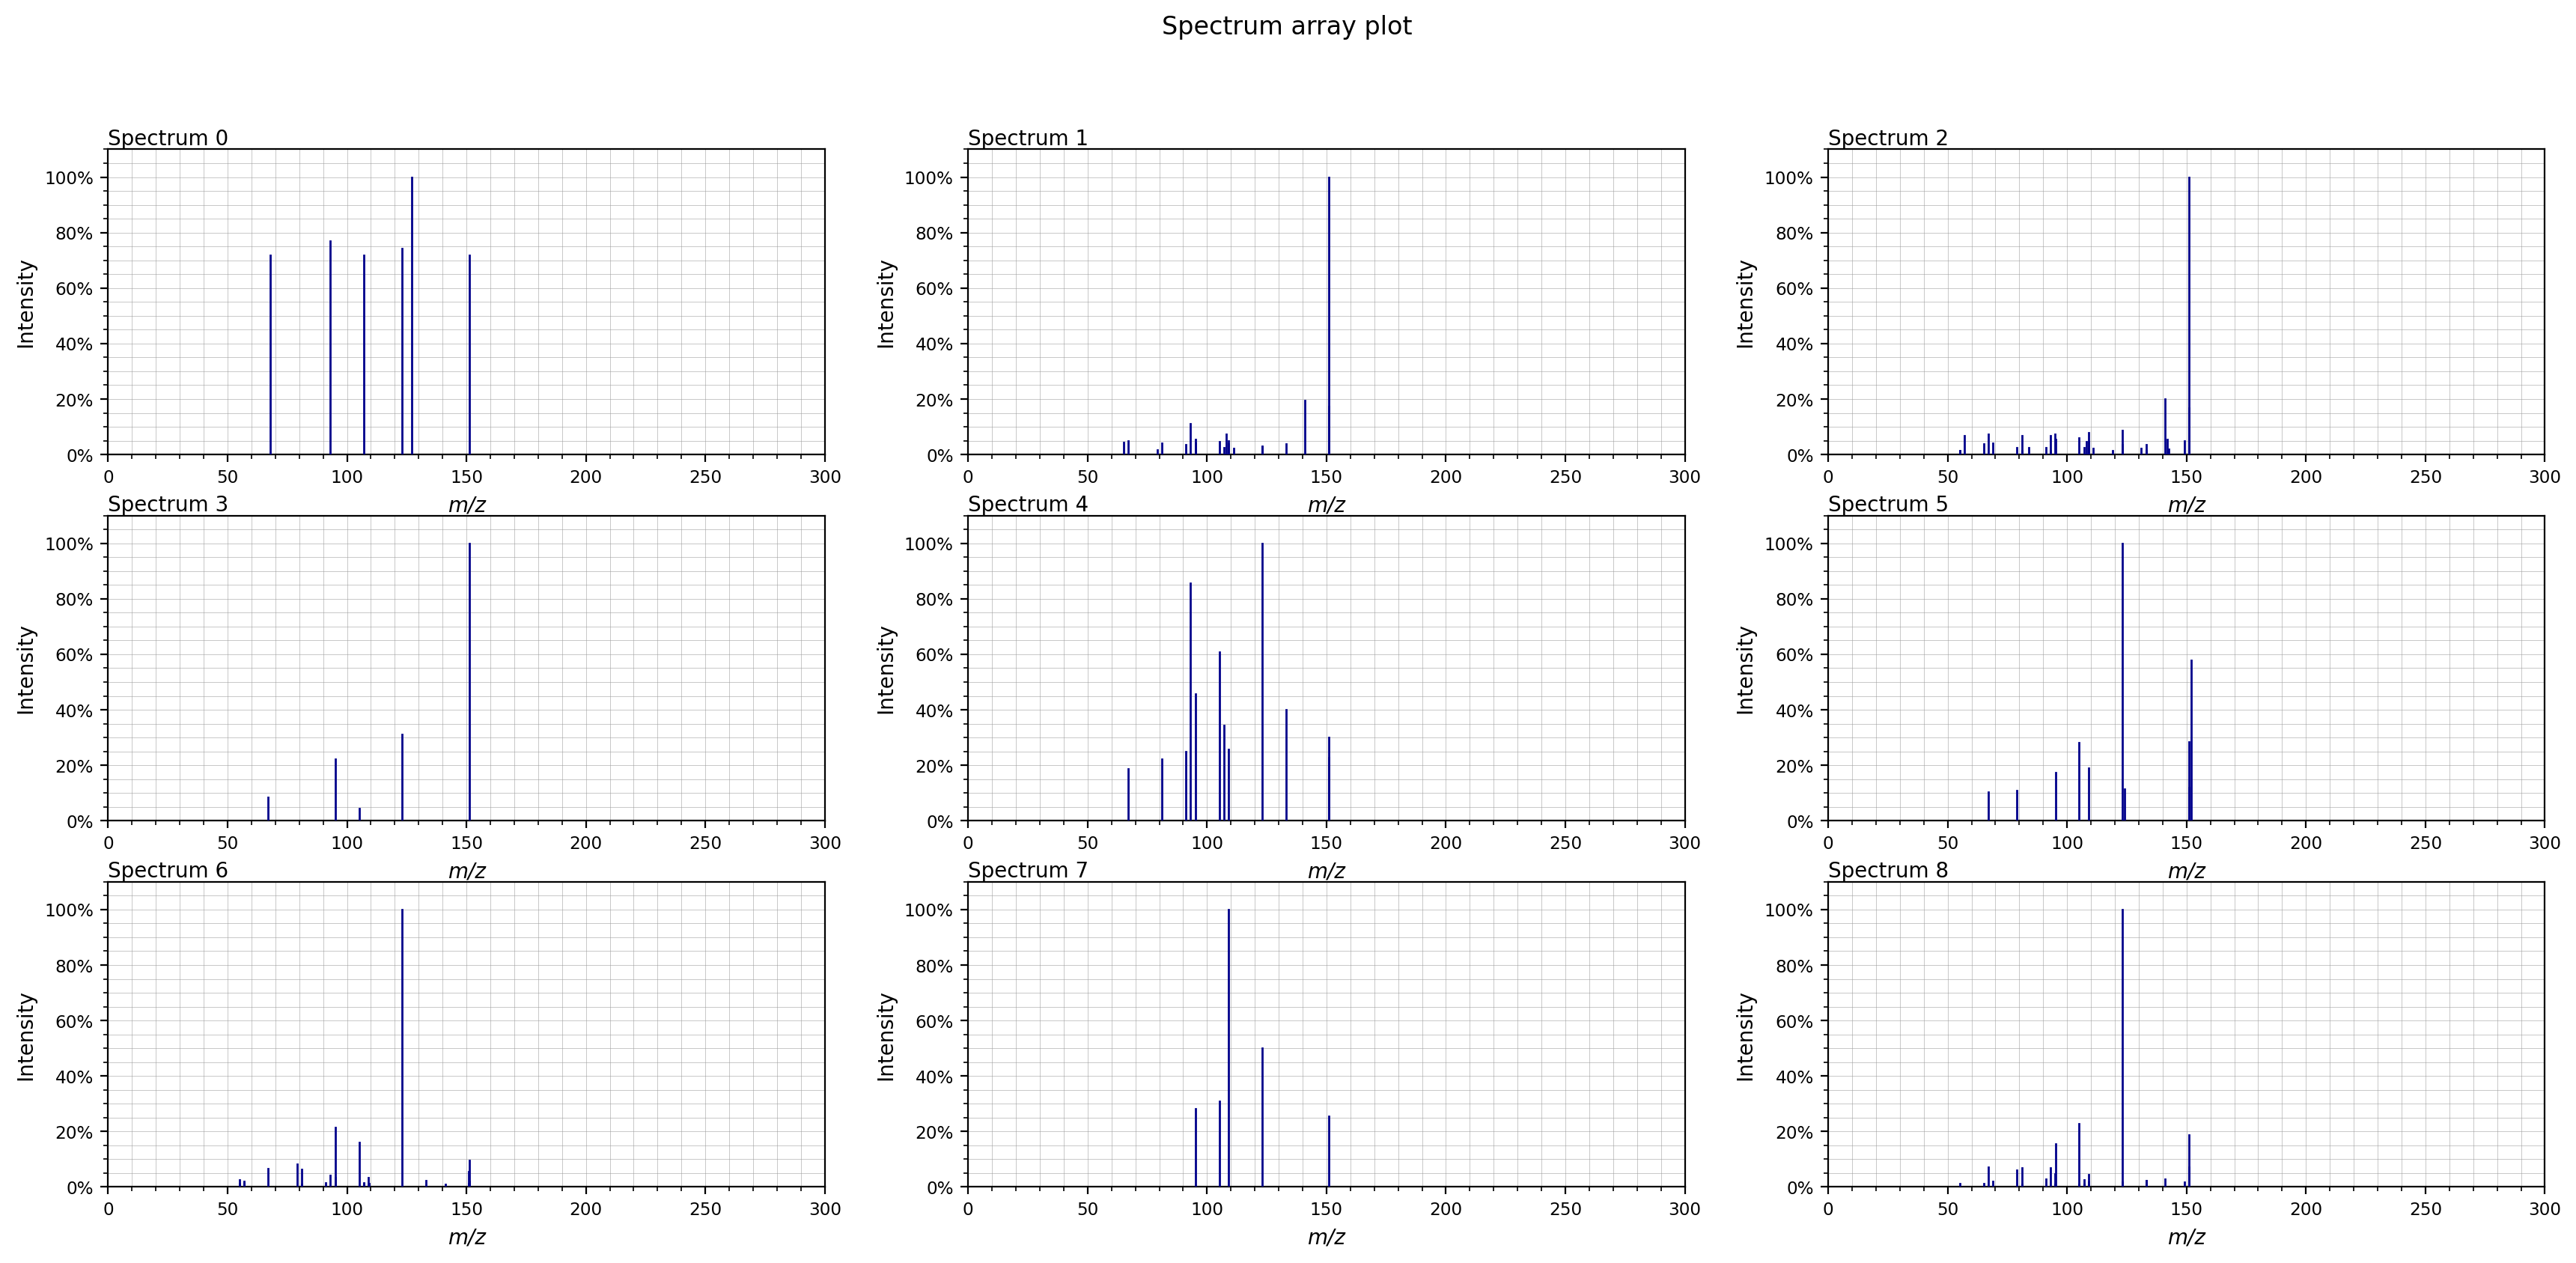

In [23]:
from matchms.plotting import plot_spectra_array

plot_spectra_array(spectra_cleaned[:9], 3)
plt.show()

## Spectrum similarity computation

Matchms comes with several spectrm similarity scores such as:
- Cosine (`CosineGreedy`)
- Modified Cosine (`ModifiedCosine`)
- Molecular fingerprint based scoring (`FingerprintSimilarity`)
- Precursor m/z matching (`PrecursorMzMatch`)

A core feature, however, is that you can also build (program) your own similarity measures or import other compatible ones (for instance: `Spec2Vec` or `MS2DeepScore`).

In [24]:
from matchms.similarity import PrecursorMzMatch, CosineGreedy

similarity_measure = PrecursorMzMatch(tolerance=0.1,
                                      tolerance_type="Dalton")
scores = calculate_scores(spectra_cleaned, spectra_cleaned, similarity_measure)
scores

In [25]:
# what is this number for?
3802 ** 2

14455204

In [26]:
scores.scores

<3802x3802x1 stacked sparse array containing scores for ('PrecursorMzMatch',) with 43660 stored elements in COOrdinate format>

In [27]:
cosine_similarity = CosineGreedy(tolerance=0.01)
scores.calculate(cosine_similarity)

In [28]:
scores.scores

<3802x3802x3 stacked sparse array containing scores for ('PrecursorMzMatch', 'CosineGreedy_score', 'CosineGreedy_matches') with 43660 stored elements in COOrdinate format>

In [29]:
print(scores.to_array()[:3, :3])

[[(1., 1.        ,  6) (0., 0.        ,  0) (0., 0.        ,  0)]
 [(0., 0.        ,  0) (1., 1.        , 24) (1., 0.98797526, 24)]
 [(0., 0.        ,  0) (1., 0.98797526, 24) (1., 1.        , 38)]]


In [30]:
results = scores.scores_by_query(spectra_cleaned[2], "CosineGreedy_score", sort=True)
results

[(<matchms.Spectrum.Spectrum at 0x7c3c531b1600>, (1., 1., 38)),
 (<matchms.Spectrum.Spectrum at 0x7c3c531b15d0>, (1., 0.98797526, 24)),
 (<matchms.Spectrum.Spectrum at 0x7c3c531b3010>, (1., 0.8882043, 17)),
 (<matchms.Spectrum.Spectrum at 0x7c3c531b2590>, (1., 0.33297139, 24)),
 (<matchms.Spectrum.Spectrum at 0x7c3c531b22f0>, (1., 0.30224982, 26)),
 (<matchms.Spectrum.Spectrum at 0x7c3c531b1b10>, (1., 0.27938733, 13)),
 (<matchms.Spectrum.Spectrum at 0x7c3c531b2ec0>, (1., 0.26135692, 21)),
 (<matchms.Spectrum.Spectrum at 0x7c3c531b2d70>, (1., 0.2504353, 18)),
 (<matchms.Spectrum.Spectrum at 0x7c3c531b2020>, (1., 0.17477811, 22)),
 (<matchms.Spectrum.Spectrum at 0x7c3c531b2bc0>, (1., 0.1732575, 11)),
 (<matchms.Spectrum.Spectrum at 0x7c3c531b2440>, (1., 0.168279, 16)),
 (<matchms.Spectrum.Spectrum at 0x7c3c531b2c20>, (1., 0.1617247, 9)),
 (<matchms.Spectrum.Spectrum at 0x7c3c531b2170>, (1., 0.13145825, 5)),
 (<matchms.Spectrum.Spectrum at 0x7c3c531b1d50>, (1., 0.10718511, 7)),
 (<matchm

### Remove scores below threshold

In [31]:
scores.filter_by_range(name="CosineGreedy_score",
                       low= 0.7)

In [32]:
scores.scores

<3802x3802x3 stacked sparse array containing scores for ('PrecursorMzMatch', 'CosineGreedy_score', 'CosineGreedy_matches') with 8802 stored elements in COOrdinate format>

In [33]:
results = scores.scores_by_query(spectra_cleaned[1], 'CosineGreedy_score', sort=True)
results

[(<matchms.Spectrum.Spectrum at 0x7c3c531b15d0>, (1., 1., 24)),
 (<matchms.Spectrum.Spectrum at 0x7c3c531b1600>, (1., 0.98797526, 24)),
 (<matchms.Spectrum.Spectrum at 0x7c3c531b3010>, (1., 0.85976034, 16))]

(<Figure size 1600x1200 with 1 Axes>,
 <Axes: title={'center': 'Spectrum comparison'}, xlabel='m/z', ylabel='Intensity'>)

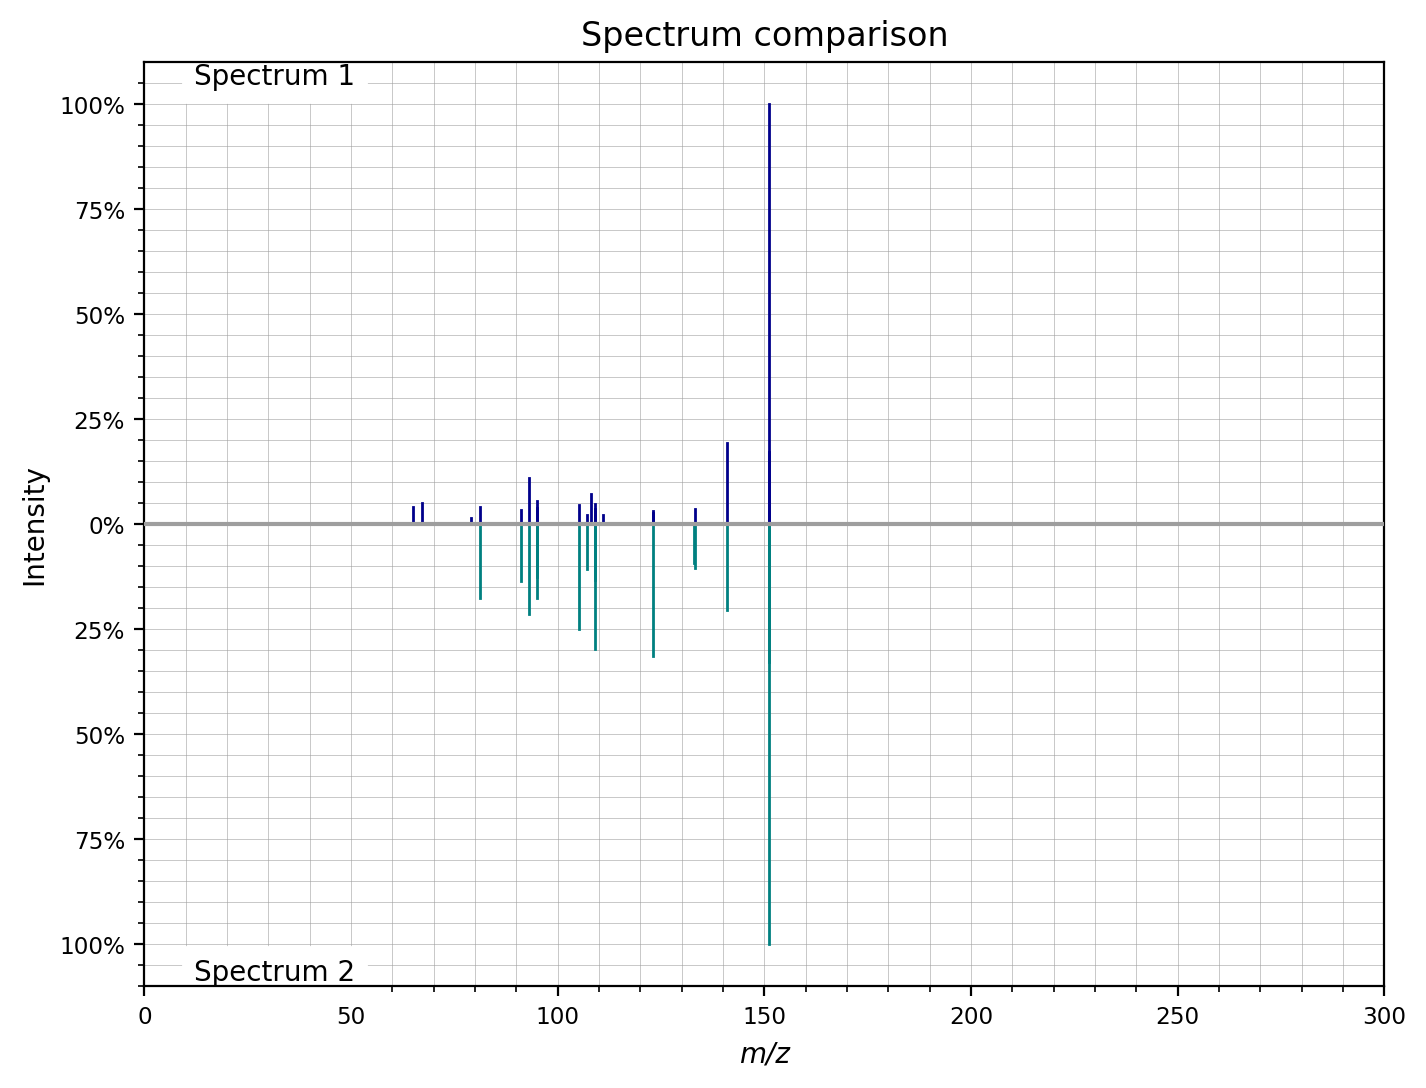

In [34]:
spectra_cleaned[1].plot_against(results[2][0])

(<Figure size 2800x1800 with 6 Axes>,
 array([[<Axes: xlabel='m/z', ylabel='Intensity'>,
         <Axes: xlabel='m/z', ylabel='Intensity'>],
        [<Axes: xlabel='m/z', ylabel='Intensity'>,
         <Axes: xlabel='m/z', ylabel='Intensity'>],
        [<Axes: xlabel='m/z', ylabel='Intensity'>,
         <Axes: xlabel='m/z', ylabel='Intensity'>]], dtype=object))

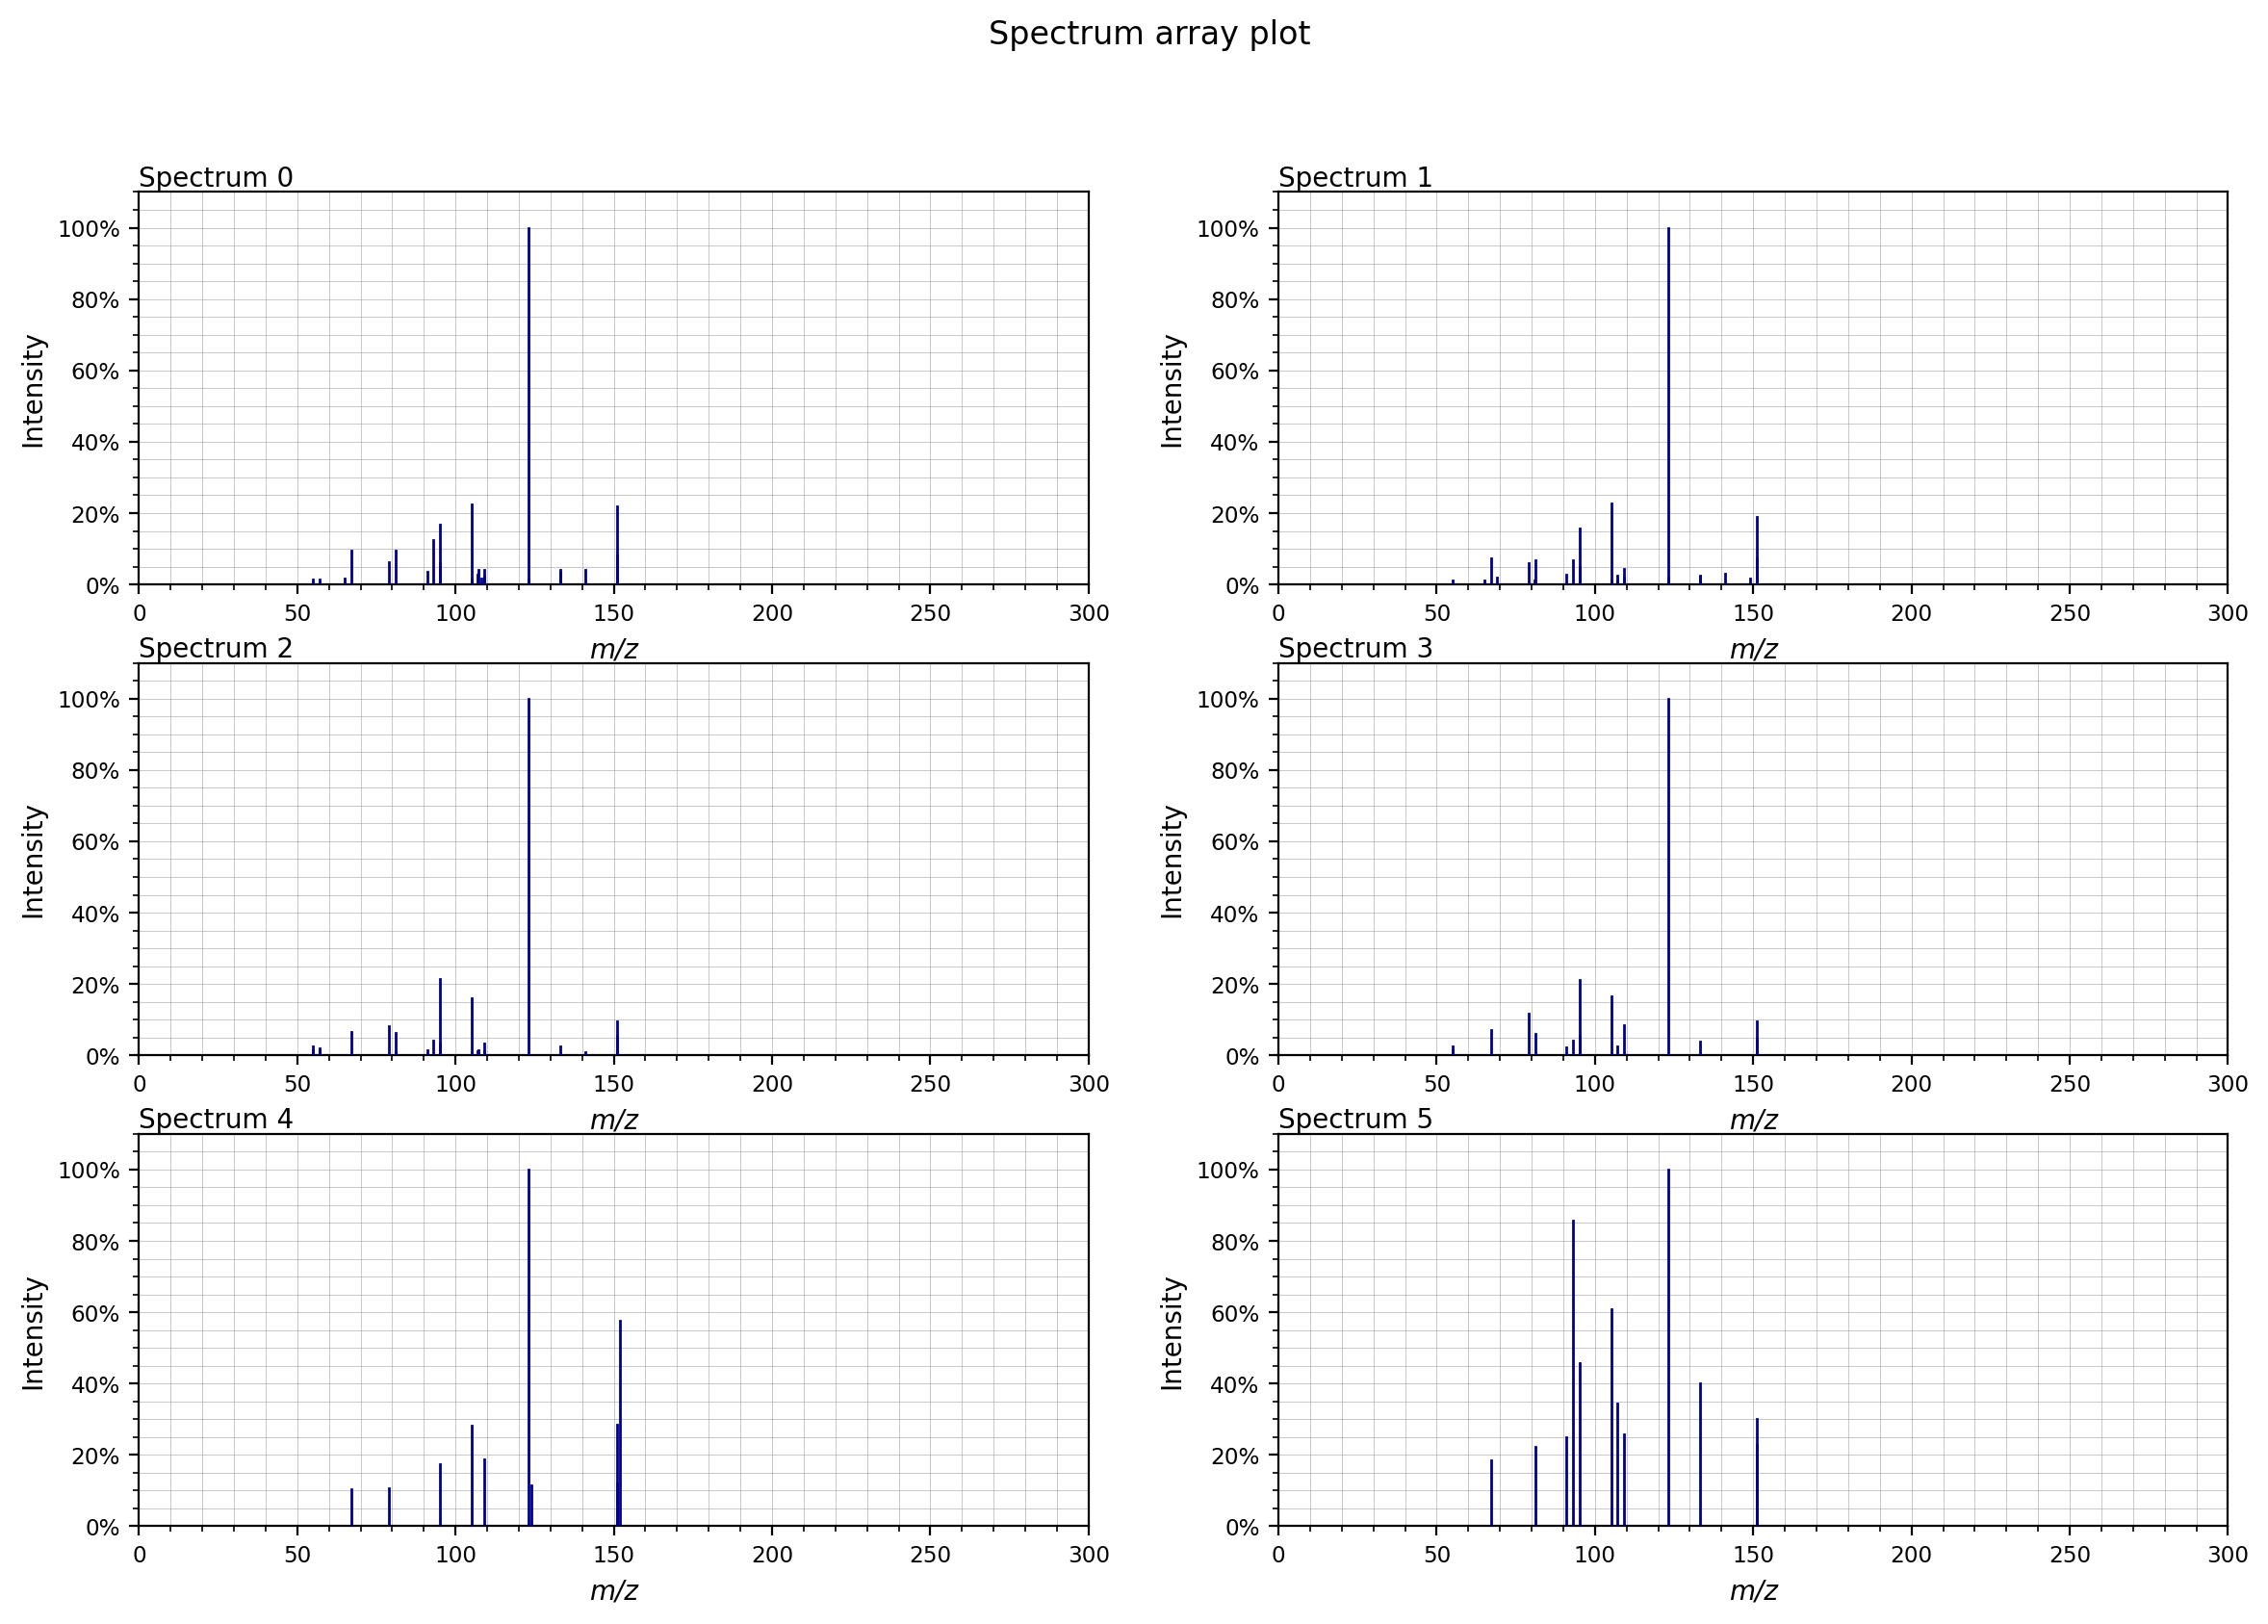

In [37]:
results = scores.scores_by_query(spectra_cleaned[10], 'CosineGreedy_score', sort=True)
plot_spectra_array([x[0] for x in results[:8]])